In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
import io
df = pd.read_csv('Restaurant.csv',usecols=['Name','Rating','Tweet','cuisines','Sentiment','Current_Rating'] )
df.head()

,Name,Rating,Tweet,cuisines,Sentiment,Current_Rating
0,Sandwich Shop,3.5,Average safe food. Not got ill. #FOODSAFE,"North Indian, European, Mediterranean, BBQ, Kebab",1,3.5
1,Sandwich Shop,2.8,Chicken inside the sandwich was #rotten and wa...,"North Indian, European, Mediterranean, BBQ, Kebab",1,2.8
2,Sandwich Shop,4.0,#SouthIndian sambhar tasted fantastic. Got eas...,"North Indian, European, Mediterranean, BBQ, Kebab",1,4.0
3,Sandwich Shop,2.0,#VEGMEAL took life of 5 children. #FOODSAFETY,"North Indian, European, Mediterranean, BBQ, Kebab",0,2.0
4,San Churro Cafe,3.2,#SouthIndian bada caused me #StomachAche and #...,"North Indian, European, Mediterranean, BBQ, Kebab",1,3.2


In [3]:
df.shape

(3013, 6)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3013 entries, 0 to 3012
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            3013 non-null   object 
 1   Rating          3013 non-null   float64
 2   Tweet           3013 non-null   object 
 3   cuisines        2835 non-null   object 
 4   Sentiment       3013 non-null   int64  
 5   Current_Rating  3013 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 141.4+ KB


In [17]:
x=df.Tweet
y=df.Sentiment

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = True)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()

X_train_sparse = vect.fit_transform(X_train)
X_test_sparse = vect.transform(X_test)
type(X_train_sparse)

scipy.sparse._csr.csr_matrix

In [20]:
X_train_sparse.shape

(2410, 1320)

In [21]:
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier()

classifier.fit(X_train_sparse, y_train)

predicted_score = classifier.predict(X_test_sparse)

In [22]:
predicted_score

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,

In [23]:
def predict_sgd():
 from sklearn.linear_model import SGDClassifier
 classifier = SGDClassifier()
 classifier.fit(X_train_sparse, y_train)
 x=input()
 X_test=[]
 X_test.append(x)
 X_test_sparse = vect.transform(X_test)
 predicted_score = classifier.predict(X_test_sparse)
 if(predicted_score[0]==1):
   print('positive Statement')
 else:
   print('Negative Statement')
predict_sgd()

good food
positive Statement


In [24]:
from sklearn import metrics

metrics.accuracy_score(y_test, predicted_score)*100

96.6832504145937

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted_score ))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       269
           1       0.98      0.96      0.97       334

    accuracy                           0.97       603
   macro avg       0.97      0.97      0.97       603
weighted avg       0.97      0.97      0.97       603



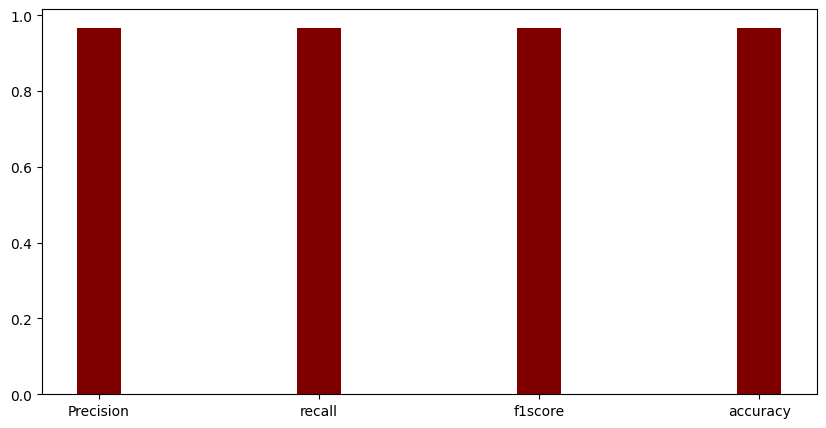

In [26]:
from sklearn.metrics import classification_report
report = classification_report(y_test, predicted_score, output_dict=True )
macro_precision=  report['macro avg']['precision'] 
macro_recall = report['macro avg']['recall']    
macro_f1 = report['macro avg']['f1-score']
accuracy = report['accuracy']
from sklearn.metrics import precision_recall_fscore_support as score
data = {'Precision':macro_precision, 'recall':macro_recall, 'f1score':macro_f1,'accuracy':accuracy}
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(courses, values, color ='maroon',width = 0.2)
plt.show()

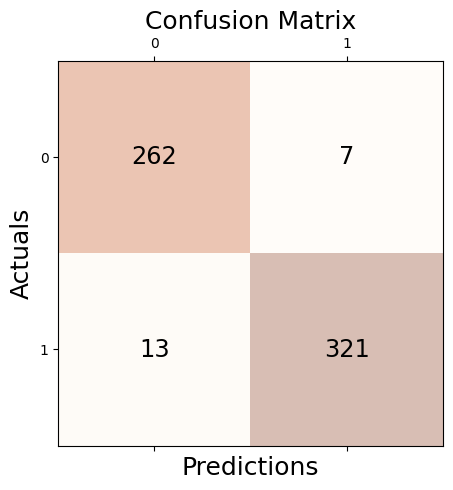

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predicted_score)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()